In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[40,20],
                [55,30],
                [70,60],
                [50,35],
                [45,40],
                [62,75],
                [45,30],
                [68,80],
                [80,70],
                [75,90]])

Text(0, 0.5, 'Science Marks')

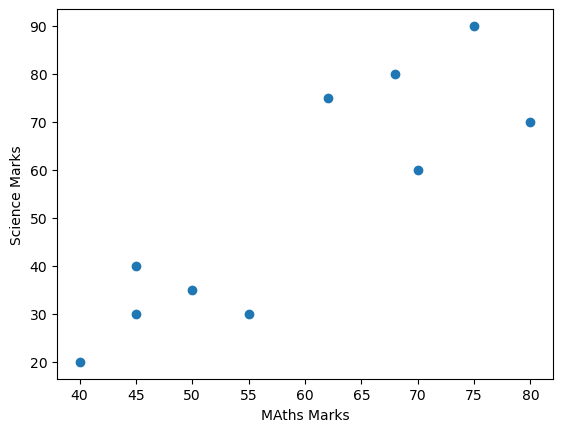

In [3]:
plt.scatter(data[:,0],data[:,1])
plt.xlabel("MAths Marks")
plt.ylabel("Science Marks")

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.39951173]
 [-0.3016828  -0.97541727]
 [ 0.82962771  0.29686613]
 [-0.67878631 -0.76337004]
 [-1.05588981 -0.5513228 ]
 [ 0.2262621   0.93300782]
 [-1.05588981 -0.97541727]
 [ 0.67878631  1.14505506]
 [ 1.58383472  0.72096059]
 [ 1.20673122  1.56914952]]


In [6]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 1)
pca.fit(scaled_data)

PCA(n_components=1)

In [11]:
pca.explained_variance_

array([2.07778406])

In [12]:
pca.explained_variance_ratio_

array([0.93500282])

In [13]:
pca_scaled_data = pca.transform(scaled_data)

In [14]:
scaled_data.shape

(10, 2)

In [15]:
pca_scaled_data.shape

(10, 1)

In [16]:
pca_scaled_data = pca.inverse_transform(pca_scaled_data)

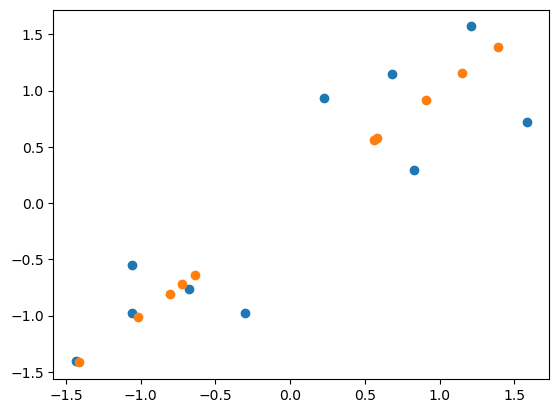

In [17]:
plt.scatter(scaled_data[:,0],scaled_data[:,1])
plt.scatter(pca_scaled_data[:,0],pca_scaled_data[:,1])

# PCA for visualization

In [19]:
from sklearn.datasets import load_digits
digits = load_digits()

In [20]:
digits.data.shape

(1797, 64)

In [23]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

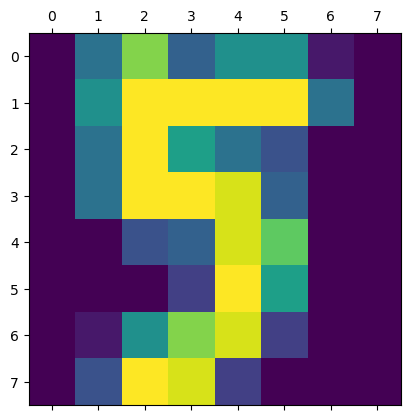

In [27]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[33])

In [28]:
digits.target[33]

5

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
new_digits = pca.fit_transform(digits.data)

In [35]:
new_digits.shape

(1797, 2)

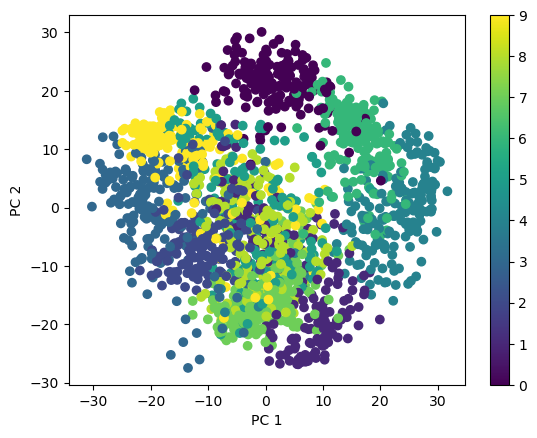

In [38]:
plt.scatter(new_digits[:,0],new_digits[:,1], c = digits.target)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()

# PCA for speedup models

In [39]:
from sklearn.datasets import load_digits
import numpy as np

In [40]:
digits = load_digits()

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [49]:
new_data_pca.shape

(1797, 10)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data, digits.target, test_size = 0.2, random_state = 42)

In [55]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(new_data_pca, digits.target, test_size = 0.2, random_state = 42)

In [44]:
x_train.shape

(1437, 64)

In [56]:
x_train1.shape

(1437, 10)

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs' , max_iter = 1000)

import time
start = time.time()
model.fit(x_train,y_train)
end = time.time()

print((end - start)* 1000)

64.82529640197754


In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs' , max_iter = 1000)

import time
start = time.time()
model.fit(x_train1,y_train1)
end = time.time()

print((end - start)* 1000)

58.124542236328125


In [47]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test,y_pred)

0.9722222222222222

In [60]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test1)
accuracy_score(y_test1,y_pred)

0.8916666666666667